<a href="https://colab.research.google.com/github/Akkijd/IIT--Guvi---Master-programming-in-Data-science/blob/main/Copy_of_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd

In [37]:
data=pd.read_csv("movies_metadata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
data.shape

(42640, 24)

In [40]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [41]:
data.shape

(42640, 24)

In [42]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## Adult

In [43]:
#data.loc[1,'adult'] ## adult -> convert to boolean
data.adult.unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [44]:
data.loc[~data.adult.isin(['False','True']),:]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
data.adult.unique()
data.adult.value_counts()


data = data.loc[data.adult.isin(['False','True']),:] # only choosing the rows where the adult column is either true or false
data.adult.unique()
#data.shape

array(['False', 'True'], dtype=object)

In [46]:
data.adult.values[0]

'False'

In [47]:
data.adult = data.adult.map({'True':1,'False':0}) #convert from string to 1/0


In [48]:
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,0,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,0,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,0,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,421556,tt4985772,en,Mo Mandel: Negative Reinforcement,Mo Mandel takes the stage in his first hour-lo...,0.083584,/1f1LkIIg8yv6Mpv4ZgKYChVdxVQ.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mo Mandel: Negative Reinforcement,False,0.0,0.0
42636,0,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,425841,tt6264486,en,Kathleen Madigan: Bothering Jesus,Kathleen Madigan's stand up special.,0.182834,/vs829p8XLdQ0Y0e9vVft2pnnLNw.jpg,[],[],2016-11-10,0.0,71.0,[],Released,NaN,Kathleen Madigan: Bothering Jesus,False,6.0,2.0
42637,0,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,425002,tt5841094,en,Dan Levy: Lion,Dan Levy works his way from a zebra to a lion ...,0.062949,/TT5cLq9x5fbes42NI2Ul3Ssbh9.jpg,[],[],2016-11-17,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dan Levy: Lion,False,0.0,0.0
42638,0,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,429788,tt6017922,en,Aries Spears: Comedy Blueprint,Armed with his ferociously aggressive style of...,0.147048,/jWwQpzVs0000fUukytgmZEV8jUT.jpg,"[{'name': 'New Wave Entertainment', 

# Belongs to Collection

In [49]:
data.belongs_to_collection.values[0]
#check if it is nan, if it is nan append 0, else - convert to a dict and append the name value

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

if the value is not nan, then convert string -> dictionary and get id value 
else if value is nan, append 0 to my ids

In [50]:
import ast
import numpy as np
ast.literal_eval(data.belongs_to_collection.values[0])

{'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg',
 'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg'}

In [51]:
2 == 2

True

In [52]:
2 == 2

True

In [53]:
import numpy as np
np.nan == np.nan

False

In [54]:
a = np.nan
a == a

False

all elements : (check if that value is ) str -> dict -> id

In [55]:
import ast

collectionIds = [] #list to store collections Ids - list that is going to store the vleaned value
for i in data['belongs_to_collection'].values: #Iterating through the column
    if i != i: # check if it is nan 
      collectionIds.append(-1) #append -1
      continue
    collectionIds.append(ast.literal_eval(i)['id'])

#collectionIds
data['collectionId'] = collectionIds
data = data.drop(columns = ['belongs_to_collection'])

In [56]:
data

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194
1,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1
2,0,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050
3,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1
4,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,421556,tt4985772,en,Mo Mandel: Negative Reinforcement,Mo Mandel takes the stage in his first hour-lo...,0.083584,/1f1LkIIg8yv6Mpv4ZgKYChVdxVQ.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mo Mandel: Negative Reinforcement,False,0.0,0.0,-1
42636,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,425841,tt6264486,en,Kathleen Madigan: Bothering Jesus,Kathleen Madigan's stand up special.,0.182834,/vs829p8XLdQ0Y0e9vVft2pnnLNw.jpg,[],[],2016-11-10,0.0,71.0,[],Released,NaN,Kathleen Madigan: Bothering Jesus,False,6.0,2.0,-1
42637,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,425002,tt5841094,en,Dan Levy: Lion,Dan Levy works his way from a zebra to a lion ...,0.062949,/TT5cLq9x5fbes42NI2Ul3Ssbh9.jpg,[],[],2016-11-17,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dan Levy: Lion,False,0.0,0.0,-1
42638,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,429788,tt6017922,en,Aries Spears: Comedy Blueprint,Armed with his ferociously aggressive style of...,0.147048,/jWwQpzVs0000fUukytgmZEV8jUT.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-24,0.0,59.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Aries Spears

# Budget

In [57]:
data.budget = data.budget.astype('int64') # explicilty type casting
data.budget.describe() #summary stats

count    4.263700e+04
mean     4.413855e+06
std      1.774645e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [58]:
sum(data.budget == 0)*100/data.shape[0]

79.81799845204868

1) Dont use budget
2) Try to look for some other dataset where these details are available
3) Bite the bullet and only do analysis with the rest of the data

In [59]:
data

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194
1,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1
2,0,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050
3,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1
4,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,421556,tt4985772,en,Mo Mandel: Negative Reinforcement,Mo Mandel takes the stage in his first hour-lo...,0.083584,/1f1LkIIg8yv6Mpv4ZgKYChVdxVQ.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mo Mandel: Negative Reinforcement,False,0.0,0.0,-1
42636,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,425841,tt6264486,en,Kathleen Madigan: Bothering Jesus,Kathleen Madigan's stand up special.,0.182834,/vs829p8XLdQ0Y0e9vVft2pnnLNw.jpg,[],[],2016-11-10,0.0,71.0,[],Released,NaN,Kathleen Madigan: Bothering Jesus,False,6.0,2.0,-1
42637,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,425002,tt5841094,en,Dan Levy: Lion,Dan Levy works his way from a zebra to a lion ...,0.062949,/TT5cLq9x5fbes42NI2Ul3Ssbh9.jpg,[],[],2016-11-17,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dan Levy: Lion,False,0.0,0.0,-1
42638,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,429788,tt6017922,en,Aries Spears: Comedy Blueprint,Armed with his ferociously aggressive style of...,0.147048,/jWwQpzVs0000fUukytgmZEV8jUT.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-24,0.0,59.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Aries Spears

# Genres

In [60]:
data.genres.values[0] #pandas -> string, list of dictionaries

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

I want to take 4 genres from the genres columns and contruct 4 columns genre1, genre2, genre3 and genre4 and each column will have an name corresponding to them, when genre is not available, I will map it to id ''

New Idea : Create a column for each genre - say 1 if the movie has the genre, else put 0

In [61]:
genres = set([])

for i in data.genres:
  genList = ast.literal_eval(i)
  for j in genList:
    genres.add(j['name'])


In [62]:
rows = [[]]
genres = list(genres)

for i in data.genres:
  genList = ast.literal_eval(i)
  movieGenres = [x['name'] for x in genList] # list of all the genres of the movie
  row = [] # store a list of 1s and 0s 
  for i in genres:
    row.append(int(i in movieGenres))
  rows.append(row)

In [63]:
genre = pd.DataFrame(rows[1:],columns = genres)
genre

,Mystery,Horror,Crime,Action,Animation,Comedy,Documentary,Science Fiction,Fantasy,Adventure,War,Family,Drama,Thriller,History,Western,TV Movie,Music,Romance,Foreign
0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42632,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42633,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42634,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42635,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
tmp = pd.concat([data,genre], axis = 1)
data.shape, genre.shape

((42637, 24), (42637, 20))

In [66]:
tmp

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId,Mystery,Horror,Crime,Action,Animation,Comedy,Documentary,Science Fiction,Fantasy,Adventure,War,Family,Drama,Thriller,History,Western,TV Movie,Music,Romance,Foreign
0,0.0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0.0,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,421556,tt4985772,en,Mo Mandel: Negative Reinforcement,Mo Mandel takes the stage in his first hour-lo...,0.083584,/1f1LkIIg8yv6Mpv4ZgKYChVdxVQ.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mo Mandel: Negative Reinforcement,False,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42636,0.0,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,425841,tt6264486,en,Kathleen Madigan: Bothering Jesus,Kathleen Madigan's stand up special.,0.182834,/vs829p8XLdQ0Y0e9vVft2pnnLNw.j

In [67]:
len(genres)

20

In [68]:
 import ast
 index = 0
 gen1 = []

 for gen in data.genres.values:
   genList = ast.literal_eval(gen) ## converts string to list of dictionary
   if len(genList) > index: ##if the list has atleast one genre
     gen1.append(genList[0]['name']) #mark the id of the genre
   else:
     gen1.append('') #mark 0 as the id

 data['genre1'] = gen1 #we have identified genre1

In [69]:
 import ast
 index = 1
 gen2 = []

 for gen in data.genres.values:
   genList = ast.literal_eval(gen) #converts string to list
   if len(genList) > index: # checks if the number of genres > 1
     gen2.append(genList[1]['name']) #takes the 2nd genre and appends to a list
   else:
     gen2.append('') #if the genre 2 is not present, append 0

 data['genre2'] = gen2

In [70]:
 import ast
 index = 2
 gen3 = []

 for gen in data.genres.values:
   genList = ast.literal_eval(gen)
   if len(genList) > index:
     gen3.append(genList[2]['name'])
   else:
     gen3.append('')

 data['genre3'] = gen3

In [71]:
 import ast
 index = 3
 gen4 = []

 for gen in data.genres.values:
   genList = ast.literal_eval(gen)
   if len(genList) > index:
     gen4.append(genList[3]['name'])
   else:
     gen4.append('')

data['genre4'] = gen4

In [72]:
sum(data.genre4 == '')*100/data.shape[0]

90.10014775898867

In [73]:
data = data.drop(columns = ['genres'])

In [74]:
data

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4
0,0,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194,Animation,Comedy,Family,
1,0,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1,Adventure,Fantasy,Family,
2,0,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050,Romance,Comedy,,
3,0,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1,Comedy,Drama,Romance,
4,0,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871,Comedy,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,NaN,421556,tt4985772,en,Mo Mandel: Negative Reinforcement,Mo Mandel takes the stage in his first hour-lo...,0.083584,/1f1LkIIg8yv6Mpv4ZgKYChVdxVQ.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mo Mandel: Negative Reinforcement,False,0.0,0.0,-1,Comedy,,,
42636,0,0,NaN,425841,tt6264486,en,Kathleen Madigan: Bothering Jesus,Kathleen Madigan's stand up special.,0.182834,/vs829p8XLdQ0Y0e9vVft2pnnLNw.jpg,[],[],2016-11-10,0.0,71.0,[],Released,NaN,Kathleen Madigan: Bothering Jesus,False,6.0,2.0,-1,Comedy,,,
42637,0,0,NaN,425002,tt5841094,en,Dan Levy: Lion,Dan Levy works his way from a zebra to a lion ...,0.062949,/TT5cLq9x5fbes42NI2Ul3Ssbh9.jpg,[],[],2016-11-17,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dan Levy: Lion,False,0.0,0.0,-1,Comedy,,,
42638,0,0,NaN,429788,tt6017922,en,Aries Spears: Comedy Blueprint,Armed with his ferociously aggressive style of...,0.147048,/jWwQpzVs0000fUukytgmZEV8jUT.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-24,0.0,59.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Aries Spears: Comedy Blueprint,False,0.0,0.0,-1,Comedy,,,


## Home Page

In [75]:
data.homepage.values[0]

'http://toystory.disney.com/toy-story'

In [76]:
data.homepage.isnull().sum()*100/data.shape[0]

82.81304969861857

In [77]:
data['homePagePresent'] = (~data.homepage.isnull()) #fasle- if null in home page else true

In [78]:
data = data.drop(columns = ['homepage'])

In [79]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent
0,0,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194,Animation,Comedy,Family,,True
1,0,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1,Adventure,Fantasy,Family,,False
2,0,0,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050,Romance,Comedy,,,False
3,0,16000000,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1,Comedy,Drama,Romance,,False
4,0,0,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871,Comedy,,,,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,421556,tt4985772,en,Mo Mandel: Negative Reinforcement,Mo Mandel takes the stage in his first hour-lo...,0.083584,/1f1LkIIg8yv6Mpv4ZgKYChVdxVQ.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mo Mandel: Negative Reinforcement,False,0.0,0.0,-1,Comedy,,,,False
42636,0,0,425841,tt6264486,en,Kathleen Madigan: Bothering Jesus,Kathleen Madigan's stand up special.,0.182834,/vs829p8XLdQ0Y0e9vVft2pnnLNw.jpg,[],[],2016-11-10,0.0,71.0,[],Released,NaN,Kathleen Madigan: Bothering Jesus,False,6.0,2.0,-1,Comedy,,,,False
42637,0,0,425002,tt5841094,en,Dan Levy: Lion,Dan Levy works his way from a zebra to a lion ...,0.062949,/TT5cLq9x5fbes42NI2Ul3Ssbh9.jpg,[],[],2016-11-17,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dan Levy: Lion,False,0.0,0.0,-1,Comedy,,,,False
42638,0,0,429788,tt6017922,en,Aries Spears: Comedy Blueprint,Armed with his ferociously aggressive style of...,0.147048,/jWwQpzVs0000fUukytgmZEV8jUT.jpg,"[{'name': 'New Wave Entertainment', 'id': 2953...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-24,0.0,59.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Aries Spears: Comedy Blueprint,False,0.0,0.0,-1,Comedy,,,,False


# Id

In [80]:
(data.shape[0] - len(data.id.unique())) #difference between movies and unique ids
data = data.drop_duplicates(subset = 'id')

In [81]:
(data.shape[0] - len(data.id.unique()))

0

In [82]:
data.imdb_id.values[0]
(data.shape[0] - len(data.imdb_id.unique()))
data = data.drop_duplicates(subset = 'imdb_id')

# Original Language

In [83]:
len(data.original_language.unique())
data.original_language.value_counts()
data.original_language.isnull().sum()
data.loc[data.original_language.isnull(),:]
data = data.dropna(subset = ['original_language'])

In [84]:
data.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'collectionId', 'genre1',
       'genre2', 'genre3', 'genre4', 'homePagePresent'],
      dtype='object')

# Title

In [85]:
data.title.isnull().sum(), len(data.title.unique())*100/data.shape[0]

(4, 93.2140509063586)

In [86]:
data.original_title.isnull().sum(), len(data.original_title.unique())*100/data.shape[0]

(0, 95.47525124448201)

In [87]:
data = data.drop(columns = ['title'])

In [88]:
data.original_title
"data science" == "Data  Science"

False

1) lower case upper case
2) remove unwanted spaces (data science, data  science)
3) checking spelling mistakes -> for places where there are a lot of chracters (textBlob)
4) handling special characters

In [89]:
data.original_title = data['original_title'].str.lower()
data.original_title = data['original_title'].str.strip()

In [90]:
data.original_title

0                                 toy story
1                                   jumanji
2                          grumpier old men
3                         waiting to exhale
4               father of the bride part ii
                        ...                
42635     mo mandel: negative reinforcement
42636     kathleen madigan: bothering jesus
42637                        dan levy: lion
42638        aries spears: comedy blueprint
42639    tony roberts: motorcity motormouth
Name: original_title, Length: 42588, dtype: object

# Overview

In [91]:
data.overview = data.overview.str.lower()
data.overview = data.overview.str.strip()
data.overview

0        led by woody, andy's toys live happily in his ...
1        when siblings judy and peter discover an encha...
2        a family wedding reignites the ancient feud be...
3        cheated on, mistreated and stepped on, the wom...
4        just when george banks has recovered from his ...
                               ...                        
42635    mo mandel takes the stage in his first hour-lo...
42636                 kathleen madigan's stand up special.
42637    dan levy works his way from a zebra to a lion ...
42638    armed with his ferociously aggressive style of...
42639    detroit native tony t. roberts returns to his ...
Name: overview, Length: 42588, dtype: object

# Popularity

In [92]:
data.popularity

0         21.9469
1         17.0155
2         11.7129
3         3.85949
4         8.38752
           ...   
42635    0.083584
42636    0.182834
42637    0.062949
42638    0.147048
42639    0.107507
Name: popularity, Length: 42588, dtype: object

In [93]:
data.popularity = data.popularity.astype('float64') ##floating point value
data.popularity.describe()
data.popularity.quantile(0.999)
# sum(data.popularity > 20)

40.16807002400711

In [94]:
##outlier detection - 1) domain knowledge 2) u need to handle them
data.popularity = data.popularity.clip(0,50)
#data = data.loc[(data.popularity > 0) & (data.popularity <= 100),:]

In [95]:
data.popularity.describe()

count    42585.000000
mean         2.923209
std          4.154043
min          0.000000
25%          0.406202
50%          1.176231
75%          3.918167
max         50.000000
Name: popularity, dtype: float64

# Vote Count and Vote Average

In [96]:
data.vote_count.describe()
data.vote_count.isna().sum()
data.vote_count[data.vote_count.isnull()] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
data.vote_average = data.vote_average.astype('float64')
data.vote_count = data.vote_count.astype('int64')

In [98]:
data.vote_count.describe()

count    42588.000000
mean       115.557716
std        505.625444
min          0.000000
25%          3.000000
50%         10.000000
75%         37.000000
max      14075.000000
Name: vote_count, dtype: float64

In [99]:
data.vote_average.describe()

count    42584.000000
mean         5.640093
std          1.896552
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [100]:
data['score'] = (data.vote_average * data.vote_count)

# Poster Path

In [101]:
data.poster_path.values[0] #null value, unique values, file exists in the path or not

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [102]:
data.poster_path.isnull().sum()

329

In [103]:
import os
os.path.isfile('/rhIRbceoE9lR4veEXuwCC2wARtG.jpg')

False

In [104]:
data = data.drop(columns = ['poster_path'])

# Production Companies

In [105]:
data = data[~data.production_companies.isnull()]

In [106]:
data.production_companies.values[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [107]:
import ast
index = 0
prod1 = []

for prod in data.production_companies.values:
  prodList = ast.literal_eval(prod)
  if len(prodList) > index:
    prod1.append(prodList[index]['name'])
  else:
    prod1.append('')

data['Producer1'] = prod1

In [108]:
import ast
index = 1
prod2 = []

for prod in data.production_companies.values:
  prodList = ast.literal_eval(prod)
  if len(prodList) > index:
    prod2.append(prodList[index]['name'])
  else:
    prod2.append('')

data['Producer2'] = prod2

In [109]:
data = data.drop(columns = ['production_companies'])

In [110]:
data['Producer1'] = data['Producer1'].str.lower()
data['Producer2'] = data['Producer2'].str.lower()

In [111]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415,10194,Animation,Comedy,Family,,True,41695.5,pixar animation studios,
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,Adventure,Fantasy,Family,,False,16649.7,tristar pictures,teitler film
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92,119050,Romance,Comedy,,,False,598.0,warner bros.,lancaster gate
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34,-1,Comedy,Drama,Romance,,False,207.4,twentieth century fox film corporation,
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173,96871,Comedy,,,,False,986.1,sandollar productions,touchstone pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,421556,tt4985772,en,mo mandel: negative reinforcement,mo mandel takes the stage in his first hour-lo...,0.083584,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0.0,67.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics
42636,0,0,425841,tt6264486,en,kathleen madigan: bothering jesus,kathleen madigan's stand up special.,0.182834,[],2016-11-10,0.0,71.0,[],Released,NaN,False,6.0,2,-1,Comedy,,,,False,12.0,,
42637,0,0,425002,tt5841094,en,dan levy: lion,dan levy works his way from a zebra to a lion ...,0.062949,[],2016-11-17,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,,
42638,0,0,429788,tt6017922,en,aries spears: comedy blueprint,armed with his ferociously aggressive style of...,0.147048,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-24,0.0,59.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics


# Release Dates

In [112]:
data.release_date.values[0]

'1995-10-30'

In [113]:
data.release_date.isnull().sum()

65

In [114]:
data.release_date

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
42635    2016-11-03
42636    2016-11-10
42637    2016-11-17
42638    2016-11-24
42639    2016-12-02
Name: release_date, Length: 42585, dtype: object

In [115]:
data = data.dropna(subset = ['release_date'])


In [116]:
data.release_date = pd.to_datetime(data.release_date, format='%Y-%m-%d', errors='ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [117]:
data.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
42635   2016-11-03
42636   2016-11-10
42637   2016-11-17
42638   2016-11-24
42639   2016-12-02
Name: release_date, Length: 42520, dtype: datetime64[ns]

In [118]:
import datetime
dateString = '10-10-2021'
date = datetime.datetime.strptime(dateString, "%d-%m-%Y") #string to datetime
date + datetime.timedelta(days = 15)
#date.strftime("%d-%B-%y") #datetime -> string

datetime.datetime(2021, 10, 25, 0, 0)

# Revenues

In [119]:
data.revenue = data.revenue.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [120]:
data.revenue.describe()

count    4.252000e+04
mean     1.180017e+07
std      6.576802e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [121]:
sum(data.revenue == 0)*100/data.shape[0]

82.99858889934148

# RunTime

In [122]:
data.runtime = data.runtime.astype('float64')
data.runtime.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


count    42320.000000
mean        94.991281
std         37.441703
min          0.000000
25%         86.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [123]:
sum(data.runtime > 300)

96

In [124]:
data.loc[data.runtime < 20,:]

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2
222,0,0,61813,tt0112899,en,dream man,kris is a homicide cop with psychic abilities....,0.155859,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,2.5,1,-1,Thriller,,,,False,2.5,keystone pictures,dream man productions inc
224,0,0,62488,tt0112854,it,destiny turns on the radio,johnny destiny burns into las vegas in his hot...,0.710671,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-28,0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fate visits in ways you never expect,False,5.3,9,-1,Crime,Comedy,Fantasy,,False,47.7,savoy pictures,rysher entertainment
398,0,0,172923,tt0112889,en,dos crímenes,greed and playing into the hand of providence ...,0.233376,[],1995-05-26,0,0.0,[],Released,NaN,False,5.0,1,-1,,,,,False,5.0,,
554,0,0,218473,tt0109226,en,"the beans of egypt, maine","the beans are poor, proud, hated by all, but a...",0.382470,[],1994-01-01,0,0.0,[],Released,NaN,False,0.0,1,-1,,,,,False,0.0,,
667,0,0,221917,tt0114307,en,the run of the country,an irish lad (matt keeslar) who fled from his ...,0.117662,"[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",1995-09-22,0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An unforgettable romance,False,8.0,2,-1,Drama,Romance,,,False,16.0,castle rock entertainment,columbia pictures corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42572,0,0,59122,tt0398259,en,peluca,the short film which napoleon dynamite was bas...,0.239901,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-01-20,0,9.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.0,4,-1,Comedy,,,,False,28.0,,
42579,0,0,32532,tt0887734,en,everything will be ok,a series of dark and troubling events forces b...,1.519048,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-01-10,0,17.0,[],Released,NaN,False,8.2,19,-1,Animation,Drama,,,False,155.8,bitter films,
42588,0,0,109398,tt0376293,de,unsere afrikareise,kubelka was asked to do a documentation group ...,0.299673,"[{'iso_3166_1': 'AT', 'name': 'Austria'}]",1966-01-01,0,13.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,False,6.9,12,-1,Documentary,,,,False,82.8,,
42621,0,0,399932,tt5630396,en,quincy jones: burning the light,"this solo, one-hour, stand-up show is the culm...",0.123259,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-06-02,0,0.0,[],Released,NaN,False,6.0,1,-1,Comedy,,,,False,6.0,717 productions,


# Spoken Languages

In [125]:
data.spoken_languages

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
42635             [{'iso_639_1': 'en', 'name': 'English'}]
42636                                                   []
42637             [{'iso_639_1': 'en', 'name': 'English'}]
42638             [{'iso_639_1': 'en', 'name': 'English'}]
42639             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 42520, dtype: object

In [126]:
import ast
totalLanguages = []

for prod in data.spoken_languages.values:
  prodList = ast.literal_eval(prod) #converting from string to list of dictionary 
  totalLanguages.append(len(prodList)) #how many languages spoken?

data['TotalLanguages'] = totalLanguages

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
data = data.drop(columns = ['spoken_languages'])

In [128]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,Animation,Comedy,Family,,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,Adventure,Fantasy,Family,,False,16649.7,tristar pictures,teitler film,2
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92,119050,Romance,Comedy,,,False,598.0,warner bros.,lancaster gate,1
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,Comedy,Drama,Romance,,False,207.4,twentieth century fox film corporation,,1
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173,96871,Comedy,,,,False,986.1,sandollar productions,touchstone pictures,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,421556,tt4985772,en,mo mandel: negative reinforcement,mo mandel takes the stage in his first hour-lo...,0.083584,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-03,0,67.0,Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics,1
42636,0,0,425841,tt6264486,en,kathleen madigan: bothering jesus,kathleen madigan's stand up special.,0.182834,[],2016-11-10,0,71.0,Released,NaN,False,6.0,2,-1,Comedy,,,,False,12.0,,,0
42637,0,0,425002,tt5841094,en,dan levy: lion,dan levy works his way from a zebra to a lion ...,0.062949,[],2016-11-17,0,0.0,Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,,,1
42638,0,0,429788,tt6017922,en,aries spears: comedy blueprint,armed with his ferociously aggressive style of...,0.147048,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-11-24,0,59.0,Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics,1


# Status

In [129]:
data.status.value_counts()

Released           42147
Rumored              208
Post Production       75
In Production         15
Planned                9
Canceled               1
Name: status, dtype: int64

In [130]:
data.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'collectionId', 'genre1', 'genre2',
       'genre3', 'genre4', 'homePagePresent', 'score', 'Producer1',
       'Producer2', 'TotalLanguages'],
      dtype='object')

# Others

In [131]:
data.tagline.isnull().sum()

22861

In [132]:
data.video.value_counts()

False    42443
True        76
Name: video, dtype: int64

In [133]:
data = data.drop(columns = ['production_countries'])

In [134]:
data.drop(columns = ['video','tagline'])

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,7.7,5415,10194,Animation,Comedy,Family,,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,6.9,2413,-1,Adventure,Fantasy,Family,,False,16649.7,tristar pictures,teitler film,2
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,6.5,92,119050,Romance,Comedy,,,False,598.0,warner bros.,lancaster gate,1
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,6.1,34,-1,Comedy,Drama,Romance,,False,207.4,twentieth century fox film corporation,,1
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,5.7,173,96871,Comedy,,,,False,986.1,sandollar productions,touchstone pictures,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,421556,tt4985772,en,mo mandel: negative reinforcement,mo mandel takes the stage in his first hour-lo...,0.083584,2016-11-03,0,67.0,Released,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics,1
42636,0,0,425841,tt6264486,en,kathleen madigan: bothering jesus,kathleen madigan's stand up special.,0.182834,2016-11-10,0,71.0,Released,6.0,2,-1,Comedy,,,,False,12.0,,,0
42637,0,0,425002,tt5841094,en,dan levy: lion,dan levy works his way from a zebra to a lion ...,0.062949,2016-11-17,0,0.0,Released,0.0,0,-1,Comedy,,,,False,0.0,,,1
42638,0,0,429788,tt6017922,en,aries spears: comedy blueprint,armed with his ferociously aggressive style of...,0.147048,2016-11-24,0,59.0,Released,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics,1


# Final Data

In [135]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,Animation,Comedy,Family,,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,Adventure,Fantasy,Family,,False,16649.7,tristar pictures,teitler film,2
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92,119050,Romance,Comedy,,,False,598.0,warner bros.,lancaster gate,1
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,Comedy,Drama,Romance,,False,207.4,twentieth century fox film corporation,,1
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173,96871,Comedy,,,,False,986.1,sandollar productions,touchstone pictures,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,0,0,421556,tt4985772,en,mo mandel: negative reinforcement,mo mandel takes the stage in his first hour-lo...,0.083584,2016-11-03,0,67.0,Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics,1
42636,0,0,425841,tt6264486,en,kathleen madigan: bothering jesus,kathleen madigan's stand up special.,0.182834,2016-11-10,0,71.0,Released,NaN,False,6.0,2,-1,Comedy,,,,False,12.0,,,0
42637,0,0,425002,tt5841094,en,dan levy: lion,dan levy works his way from a zebra to a lion ...,0.062949,2016-11-17,0,0.0,Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,,,1
42638,0,0,429788,tt6017922,en,aries spears: comedy blueprint,armed with his ferociously aggressive style of...,0.147048,2016-11-24,0,59.0,Released,NaN,False,0.0,0,-1,Comedy,,,,False,0.0,new wave entertainment,comedy dynamics,1


In [136]:
data.shape

(42520, 26)

In [137]:
dataBudgetRevenue  = data.loc[(data.budget != 0) & (data.revenue != 0),:]
dataBudgetRevenue

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,Animation,Comedy,Family,,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,Adventure,Fantasy,Family,,False,16649.7,tristar pictures,teitler film,2
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,Comedy,Drama,Romance,,False,207.4,twentieth century fox film corporation,,1
5,0,60000000,949,tt0113277,en,heat,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170.0,Released,A Los Angeles Crime Saga,False,7.7,1886,-1,Action,Crime,Drama,Thriller,False,14522.2,regency enterprises,forward pass,2
8,0,35000000,9091,tt0114576,en,sudden death,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106.0,Released,Terror goes into overtime.,False,5.5,174,-1,Action,Adventure,Thriller,,False,957.0,universal pictures,imperial entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42309,0,110000000,315837,tt1219827,en,ghost in the shell,"in the near future, major is the first of her ...",50.000000,2017-03-29,169801921,107.0,Released,There's nothing sadder than a puppet without a...,False,5.9,2547,-1,Action,Science Fiction,Thriller,,True,15027.3,paramount pictures,dreamworks skg,2
42355,0,55000000,341174,tt4465564,en,fifty shades darker,when a wounded christian grey tries to entice ...,29.130443,2017-02-08,378827494,118.0,Released,Every fairy tale has a dark side.,False,6.0,2341,344830,Drama,Romance,,,True,14046.0,universal pictures,perfect world pictures (beijing),1
42411,0,4000000,425942,tt5614612,es,nieve negra,accused of killing his brother during adolesce...,10.067238,2017-01-19,1440000,90.0,Released,Would you be able to keep a secret?,False,6.0,39,-1,Mystery,Drama,Crime,Thriller,False,234.0,telefe,a contracorriente films,1
42536,0,10000000,330947,tt2062700,en,song to song,in this modern love story set against the aust...,12.928712,2017-03-17,443684,129.0,Released,Love. Obsession. Betrayal.,False,5.4,179,-1,Drama,Music,Romance,,True,966.6,filmnation entertainment,buckeye pictures,1


In [138]:
# dataBudgetRevenue.to_csv('finalCleanedData.csv')
# dataBudgetRevenue.columns
dataBudgetRevenue['profit'] = (dataBudgetRevenue.revenue - dataBudgetRevenue.budget)/dataBudgetRevenue.budget
#dataBudgetRevenue['profit%'].describe()
dataBudgetRevenue['profit'] = dataBudgetRevenue['profit'].clip(-1,50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [139]:
dataBudgetRevenue.to_csv('finalCleanedData.csv')

1. Profit = (Revenue - Budget)/Budget
2. Do the movies that have high vote_avergae make lot of profits ? 
3. What genres make the most money?
4. Which producers generally do well? 
5. Is there a bias with producers in terms of genres that they do - Do specific producer only produce specific genre movies?
6. Will a longer run time bring higher profits?
7. Does the presence of a homepage indicate higher profits
8. Which languages rakes in high profit
9. Over a period of time, how have the profitability changed - Over the period of time, which genre of movies have grossed well ? 
10. If the movie speaks multiple languages, is the profit % higher?

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

In [141]:
#1.Profit = (Revenue - Budget)/Budget
finaldata = pd.read_csv('finalCleanedData.csv')
finaldata['profit'] = (finaldata.revenue - finaldata.budget)/finaldata.budget
finaldata[finaldata['profit'] == finaldata['profit'].max()]
finaldata[['id','original_title','genre1','genre2','genre3','genre4','profit', 'revenue']].sort_values(['profit'], ascending=False).head(10).style.background_gradient(subset=['profit', 'revenue'], cmap='PuBu')



,id,original_title,genre1,genre2,genre3,genre4,profit,revenue
1460,13703,less than zero,Drama,Crime,Romance,nan,12396382.000000,12396383
1240,3082,modern times,Drama,Comedy,nan,nan,8499999.000000,8500000
3463,14968,웰컴 투 동막골,War,Comedy,Drama,History,4197475.625000,33579813
4372,114903,aquí entre nos,Comedy,nan,nan,nan,2755583.000000,2755584
883,8856,"the karate kid, part ii",Adventure,Drama,Action,Romance,1018618.283186,115103979
4627,78383,nurse 3-d,Horror,Thriller,nan,nan,999999.000000,10000000
3740,50217,from prada to nada,Comedy,Drama,Romance,nan,26880.720430,2500000
3433,23827,paranormal activity,Horror,Mystery,nan,nan,12889.386667,193355800
2411,1435,tarnation,Documentary,Drama,nan,nan,5329.339450,1162014
990,2667,the blair witch project,Horror,Mystery,nan,nan,4132.333333,248000000


In [142]:
#2.Do the movies that have high vote_avergae make lot of profits ?
#data[data['vote_count'] > 3000][['original_title','release_date','vote_average']].sort_values('vote_average', ascending=False).head(10)
finaldata[['vote_average','profit']].sort_values('vote_average', ascending=False)


#The below dataframe shows movies with highest Vote_average is not making lot of profits. 

,vote_average,profit
2634,9.1,6.575758
4938,9.0,1.933333
1037,8.7,3.149102
4982,8.6,-0.308711
122,8.5,0.133659
...,...,...
1080,0.0,-0.984989
3637,0.0,-0.999943
3739,0.0,0.880133
4924,0.0,-0.999992


In [187]:
#3.What genres make the most money?
#finaldata[['genre1','genre2','genre3','genre4','profit']].sort_values('profit', ascending=False)
#finaldata[finaldata['profit'] == finaldata['profit'].max()]
finaldata[['id','original_title','genre1','genre2','genre3','genre4','profit', 'revenue']].sort_values(['profit'], ascending=False).head(10).style.background_gradient(subset=['profit', 'revenue'], cmap='PuBu')
#finaldata[['genre1','profit']]
#finaldata.boxplot(by ='genre1', column =['profit'], grid = False)


,id,original_title,genre1,genre2,genre3,genre4,profit,revenue
1460,13703,less than zero,Drama,Crime,Romance,nan,12396382.000000,12396383
1240,3082,modern times,Drama,Comedy,nan,nan,8499999.000000,8500000
3463,14968,웰컴 투 동막골,War,Comedy,Drama,History,4197475.625000,33579813
4372,114903,aquí entre nos,Comedy,nan,nan,nan,2755583.000000,2755584
883,8856,"the karate kid, part ii",Adventure,Drama,Action,Romance,1018618.283186,115103979
4627,78383,nurse 3-d,Horror,Thriller,nan,nan,999999.000000,10000000
3740,50217,from prada to nada,Comedy,Drama,Romance,nan,26880.720430,2500000
3433,23827,paranormal activity,Horror,Mystery,nan,nan,12889.386667,193355800
2411,1435,tarnation,Documentary,Drama,nan,nan,5329.339450,1162014
990,2667,the blair witch project,Horror,Mystery,nan,nan,4132.333333,248000000


In [144]:
#4.Which producers generally do well?
finaldata[finaldata['profit'] == finaldata['profit'].max()]
finaldata[['id','original_title','Producer1','Producer2','profit', 'revenue']].sort_values(['profit'], ascending=False).head(10).style.background_gradient(subset=['profit', 'revenue'], cmap='PuBu')

,id,original_title,Producer1,Producer2,profit,revenue
1460,13703,less than zero,twentieth century fox film corporation,amercent films,12396382.000000,12396383
1240,3082,modern times,united artists,charles chaplin productions,8499999.000000,8500000
3463,14968,웰컴 투 동막골,film it suda,nan,4197475.625000,33579813
4372,114903,aquí entre nos,nan,nan,2755583.000000,2755584
883,8856,"the karate kid, part ii",columbia pictures corporation,delphi v productions,1018618.283186,115103979
4627,78383,nurse 3-d,lions gate,lions gate entertainments,999999.000000,10000000
3740,50217,from prada to nada,lewis gilbert productions,lionsgate,26880.720430,2500000
3433,23827,paranormal activity,blumhouse productions,solana films,12889.386667,193355800
2411,1435,tarnation,nan,nan,5329.339450,1162014
990,2667,the blair witch project,artisan entertainment,haxan films,4132.333333,248000000


In [ ]:
#5.Is there a bias with producers in terms of genres that they do - Do specific producer only produce specific genre movies?

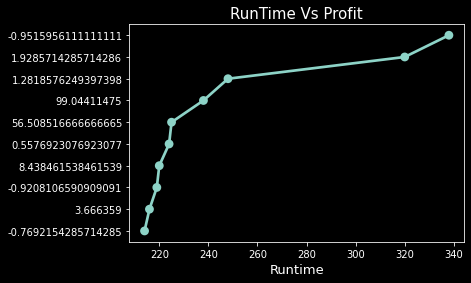

In [146]:
#6.Will a longer run time bring higher profits?
#finaldata[finaldata['runtime'] == finaldata['runtime'].max()]
info = pd.DataFrame(finaldata['runtime'].sort_values(ascending = False))
info['profit'] = finaldata['profit']
data = list(map(str,(info['profit'])))
x = list(data[:10])
y = list(info['runtime'][:10])


ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("RunTime Vs Profit",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

#From the below figure we can say that the profit is independent of movies runtime

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


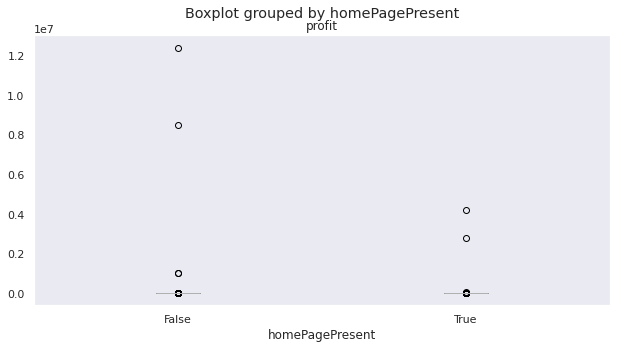

In [154]:
#7.Does the presence of a homepage indicate higher profits?
finaldata.boxplot(by ='homePagePresent', column =['profit'], grid = False)


In [ ]:
#8.Which languages rakes in high profit?



In [299]:
#9.Over a period of time, how have the profitability changed - Over the period of time, which genre of movies have grossed well ?

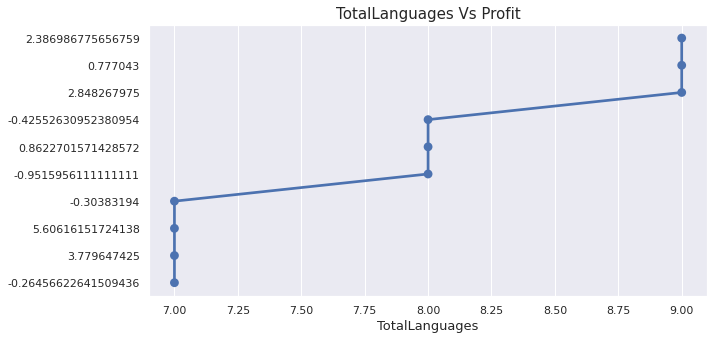

In [148]:
#10.If the movie speaks multiple languages, is the profit % higher?
info = pd.DataFrame(finaldata['TotalLanguages'].sort_values(ascending = False))
info['profit'] = finaldata['profit']
data = list(map(str,(info['profit'])))
x = list(data[:10])
y = list(info['TotalLanguages'][:10])


ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("TotalLanguages Vs Profit",fontsize = 15)
ax.set_xlabel("TotalLanguages",fontsize = 13)
sns.set_style("darkgrid")
#From the below plot we can say that the profit is independent of multiple languages